### Module 14 Lab: Practice with SVM: Predict Abalone adult/youth

The goal is the classify each abalone as 'adult' or 'youth'

Recall, in the target column: adult = 1, youth = 0

In [2]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
import pandas as pd
import numpy as np
import pickle
import time

### 1. Load and investigate the data


In [3]:
# Setup boto3
sess = boto3.session.Session()
s3 = sess.client('s3') 
# Define the bucket & file you want to load
source_bucket = 'machinelearning-shared'
source_key = 'data/kcolvin/abalone_clean.pkl'  # You must use your data here
# Get the file from S3 
response = s3.get_object(Bucket = source_bucket, Key = source_key)
#
# Read the 'Body' part of the response into a variable. This is where the DataFrame data exists in the response.
body = response['Body'].read()
#
# Create a new pandas DataFrame using the pickle.loads() function
abalone_df = pickle.loads(body)
abalone_df.head(3)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,target
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,1
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,0


In [4]:
# This will be binary classification
print('Unique values in target:', abalone_df['target'].unique().tolist())

Unique values in target: [1, 0]


In [5]:
# Data types: All integers or floats
abalone_df.dtypes

sex                 int64
length            float64
diameter          float64
height            float64
whole weight      float64
shucked weight    float64
viscera weight    float64
shell weight      float64
target              int64
dtype: object

In [6]:
# Have a look at the scales of the features
abalone_df.describe()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,target
count,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000
mean,0.461023,0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208,0.646914
std,0.498566,0.095821,0.078850,0.037421,0.453217,0.212193,0.101880,0.128835,0.478014
min,0.000000,0.155000,0.110000,0.015000,0.015500,0.006500,0.003000,0.005000,0.000000
25%,0.000000,0.515000,0.400000,0.135000,0.701250,0.287000,0.152000,0.202500,0.000000
50%,0.000000,0.585000,0.460000,0.155000,1.003000,0.431500,0.217000,0.285000,1.000000
75%,1.000000,0.635000,0.500000,0.175000,1.289500,0.568750,0.287500,0.365000,1.000000
max,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000


### 3. Create the training and test datasets

In [7]:
# Features
X = abalone_df.drop(['target'],axis = 1)
# Target
y = abalone_df['target']
# Split into train/test
# Reserve 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42)
# Verify the sizes of the split datasets
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (2268, 8)
y_train: (2268,)
X_test: (567, 8)
y_test: (567,)


In [8]:
# Quick check on number of adults/youth in the data sets
print(y_train.value_counts())
print(y_test.value_counts())

1    1481
0     787
Name: target, dtype: int64
1    353
0    214
Name: target, dtype: int64


### 4. Setup and Create the pipeline

In [8]:
# Your code here:
# Create the scaler
scaler = 'what scaler will you use?'
# Create the model
svm_bc = 'What model will you use?'
# Create the steps: recall, this is a list of tuples
steps = 'define your steps'
#
# Create the pipeline
pipe = 'define your pipeline with the Pipeline() and the steps'
pipe # Show parameters

'define your pipeline with the Pipeline() and the steps'

In [9]:
# kcolvin
# Create the scaler
norm_scaler = MinMaxScaler()
# Create the model
svm_mc = svm.SVC() # SVM classifier with default parameters
# Create the steps
steps = [('Normalizer', norm_scaler), ('SVM_classifier', svm_mc)]
#
# Create the pipeline
pipe = Pipeline(steps)
pipe # Show parameters

Pipeline(memory=None,
         steps=[('Normalizer', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('SVM_classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 5. Transform data and train the model

In [10]:
# your code here
# Now, perform the pipeline steps on the data
# The end result is a trained model
# Hint: what function do you call when you want to transform & train the model?
pipe 

Pipeline(memory=None,
         steps=[('Normalizer', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('SVM_classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [11]:
# kcolvin
# Now, perform the pipeline steps on the data
# The end result is a trained model
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('Normalizer', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('SVM_classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 5. Evaluate performance

In [12]:
# Your pipe mus be fit for this code to run
#
# Predict based on the X_test data
y_pred = pipe.predict(X_test)
# Calculate the accuracy
acc = pipe.score(X_test, y_test)
print('Accuracy based on test data:', acc)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Youth', 'Adult'], 
                     columns = ['Youth', 'Adult'])
cm_df

Accuracy based on test data: 0.7178130511463845


,Youth,Adult
Youth,97,117
Adult,43,310


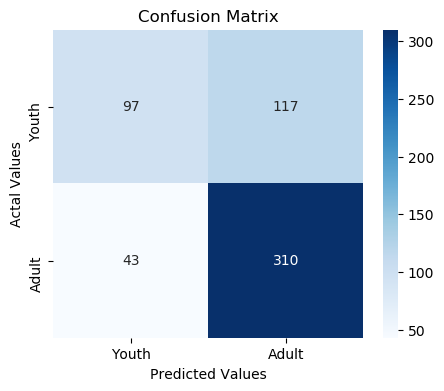

In [13]:
# Plot a fancy confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()